<a href="https://colab.research.google.com/github/neha2003-git/kaggle-playground-series/blob/main/Competitions/Titanic%20competition/_scikitlearn_titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Connecting to Kaggle**

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nehakurian","key":"f909df87d14435c831beb85e13866596"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions list

ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/arc-prize-2025                                  2025-11-03 23:59:00  Featured         1,000,000 Usd       1422           False  
https://www.kaggle.com/competitions/hull-tactical-market-prediction                 2025-12-15 23:59:00  Featured           100,000 Usd       1622           False  
https://www.kaggle.com/competitions/csiro-biomass                                   2026-01-28 23:59:00  Research            75,000 Usd        373           False  
https://www.kaggle.com/competitions/recodai-luc-scientific-image-forgery-detection  2026-01-15 23:59:00  Research            55,000 Usd        255           False  
https://ww

# **Preparing the tool**
Using Pandas, Matplotlib and NumPy for data anaylsis and manipulation

In [ ]:
#import all the tools
# Regular EDA (Exploratory Data Anaylsis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# **Load the Data**

### **Variable Notes**
```
Survival	0 = No, 1 = Yes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
1 = 1st, 2 = 2nd, 3 = 3rd

age: Age is fractional if less than 1.
If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
```

In [ ]:
#Training set
train_df = pd.read_csv("train.csv")
train_df.shape

#Test set
test_df = pd.read_csv("test.csv")
test_df.shape

(418, 11)

### Data Exploration (Exploratory Data Analysis or EDA)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Find out how many of each class there are
train_df["Survived"].value_counts()

,count
Survived,
0,549
1,342


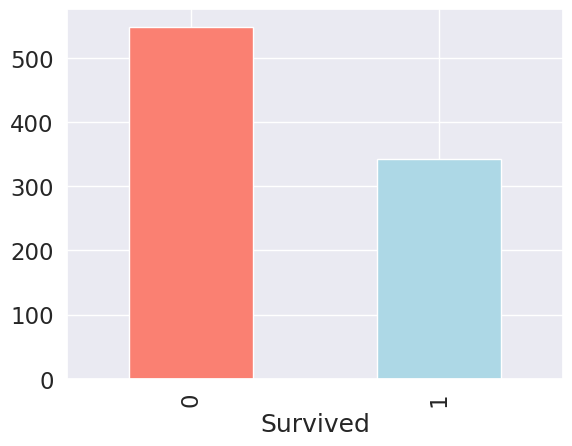

In [ ]:
train_df["Survived"].value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [ ]:
#Missing values
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


,Sex,Survived
0,female,0.742038
1,male,0.188908


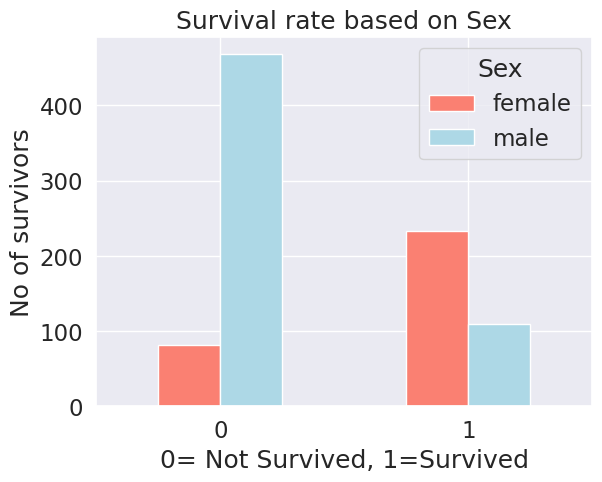

In [ ]:
#Comparing survived column with sex column
pd.crosstab(train_df.Survived, train_df.Sex).plot(kind='bar', color=['salmon','lightblue']);

plt.title("Survival rate based on Sex")
plt.xlabel("0= Not Survived, 1=Survived")
plt.ylabel("No of survivors")
plt.xticks(rotation=0)


train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

**Note:**

*Converting Sex into numeric value*

```
Female = 1
Male = 0
```

In [ ]:
train_df['Sex'] = train_df['Sex'].replace({'male':0, 'female':1})
test_df['Sex'] = test_df['Sex'].replace({'male':0, 'female':1})

/tmp/ipython-input-1756293214.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Sex'] = train_df['Sex'].replace({'male':0, 'female':1})
/tmp/ipython-input-1756293214.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Sex'] = test_df['Sex'].replace({'male':0, 'female':1})


In [ ]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


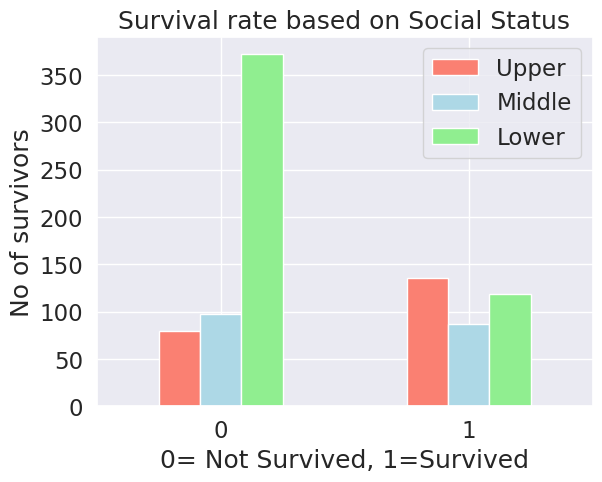

In [ ]:
#Comparing survived column with Pclass column
pd.crosstab(train_df.Survived, train_df.Pclass).plot(kind='bar', color=['salmon','lightblue','lightgreen']);

plt.title("Survival rate based on Social Status")
plt.xlabel("0= Not Survived, 1=Survived")
plt.ylabel("No of survivors")
plt.legend(['Upper','Middle','Lower'])
plt.xticks(rotation=0)

train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

In [ ]:
#Comparing survived column with Siblings column
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
#Comparing survived column with Parch column
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [ ]:
#Combing Siblings and Parents and the person into `Family Size` colmn
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.45,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C148,C,1
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,NaN,Q,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,3


In [ ]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [ ]:
#Grouping by family size
family_map = {1:'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map(family_map)

In [ ]:
#Comparing survived column with Family Size Group column
train_df.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


**Note:**

*Converting Family size group into numerics with*
```
Alone = 1
Small = 2
Medium = 3
Large = 4
```

In [ ]:
train_df['Family_Size_Grouped_no'] = train_df['Family_Size_Grouped'].replace({'Alone':1, 'Small':2, 'Medium':3, 'Large':4})
test_df['Family_Size_Grouped_no'] = test_df['Family_Size_Grouped'].replace({'Alone':1, 'Small':2, 'Medium':3, 'Large':4})

/tmp/ipython-input-1624025675.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Family_Size_Grouped_no'] = train_df['Family_Size_Grouped'].replace({'Alone':1, 'Small':2, 'Medium':3, 'Large':4})
/tmp/ipython-input-1624025675.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Family_Size_Grouped_no'] = test_df['Family_Size_Grouped'].replace({'Alone':1, 'Small':2, 'Medium':3, 'Large':4})


In [ ]:
train_df.groupby(['Family_Size_Grouped_no'], as_index=False)['Survived'].mean()

,Family_Size_Grouped_no,Survived
0,1,0.303538
1,2,0.578767
2,3,0.162162
3,4,0.160000


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Family_Size_Grouped_no
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,NaN,S,1,Alone,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,B42,S,1,Alone,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.45,NaN,S,4,Small,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C148,C,1,Alone,1
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,NaN,Q,1,Alone,1


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


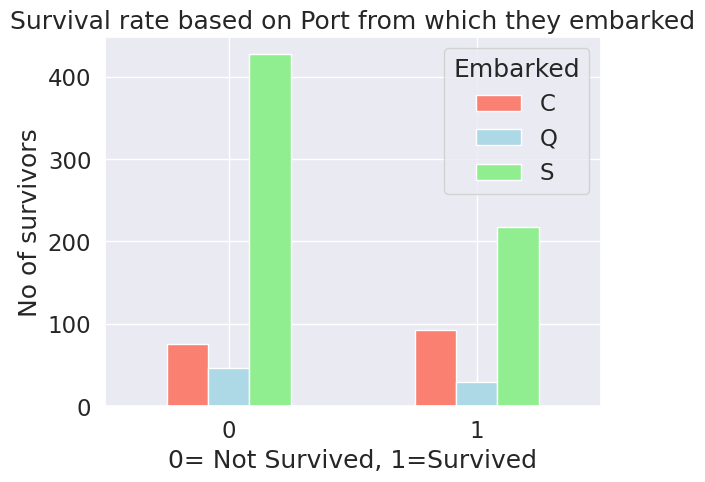

In [ ]:
#Comparing survived column with Embarked column
pd.crosstab(train_df.Survived, train_df.Embarked).plot(kind='bar', color=['salmon','lightblue','lightgreen']);

plt.title("Survival rate based on Port from which they embarked")
plt.xlabel("0= Not Survived, 1=Survived")
plt.ylabel("No of survivors")
plt.xticks(rotation=0)

train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

**Note:**

*Converting Port Embarked from into numeric data:*
```
S = 0
C = 1
Q = 2
```

In [ ]:
train_df['Embarked'] = train_df['Embarked'].replace({'S':0, 'C':1, 'Q':2})
test_df['Embarked'] = test_df['Embarked'].replace({'S':0, 'C':1, 'Q':2})

/tmp/ipython-input-958353542.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Embarked'] = train_df['Embarked'].replace({'S':0, 'C':1, 'Q':2})
/tmp/ipython-input-958353542.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Embarked'] = test_df['Embarked'].replace({'S':0, 'C':1, 'Q':2})


In [ ]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,0.0,0.336957
1,1.0,0.553571
2,2.0,0.389610


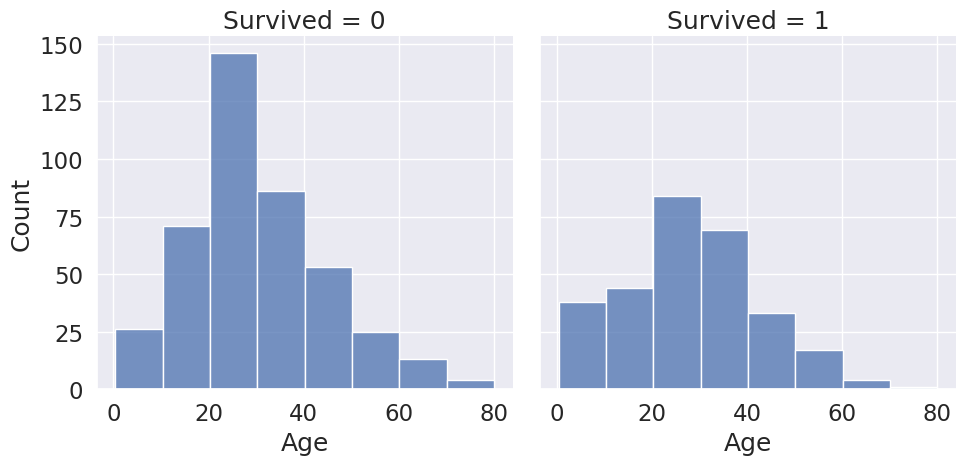

In [ ]:
#Age
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

In [ ]:
#Grouping Ages
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 8)

In [ ]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

/tmp/ipython-input-1587675067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [ ]:
#Grouping Age for Training Data
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24.0), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24.0) & (train_df['Age'] <= 28.0), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28.0) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38.0), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38.0) & (train_df['Age'] <= 47.0), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47.0) & (train_df['Age'] <= 80.0), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age']

#Grouping Age for Testing Data
test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24.0), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24.0) & (test_df['Age'] <= 28.0), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28.0) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38.0), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38.0) & (test_df['Age'] <= 47.0), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47.0) & (test_df['Age'] <= 80.0), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age']



,Age


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Family_Size_Grouped_no,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0.0,2,Small,2,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,PC 17599,71.2833,C85,1.0,2,Small,2,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,Alone,1,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5.0,1,0,113803,53.1000,C123,0.0,2,Small,2,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",0,5.0,0,0,373450,8.0500,NaN,0.0,1,Alone,1,"(32.312, 38.0]"


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Family_Size_Grouped_no,Age_Cut
0,892,3,"Kelly, Mr. James",0,5.0,0,0,330911,7.8292,NaN,2,1,Alone,1,"(32.0, 39.0]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,6.0,1,0,363272,7.0000,NaN,0,2,Small,2,"(39.0, 48.0]"
2,894,2,"Myles, Mr. Thomas Francis",0,7.0,0,0,240276,9.6875,NaN,2,1,Alone,1,"(48.0, 76.0]"
3,895,3,"Wirz, Mr. Albert",0,3.0,0,0,315154,8.6625,NaN,0,1,Alone,1,"(24.0, 27.0]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2.0,1,1,3101298,12.2875,NaN,0,3,Small,2,"(21.0, 24.0]"


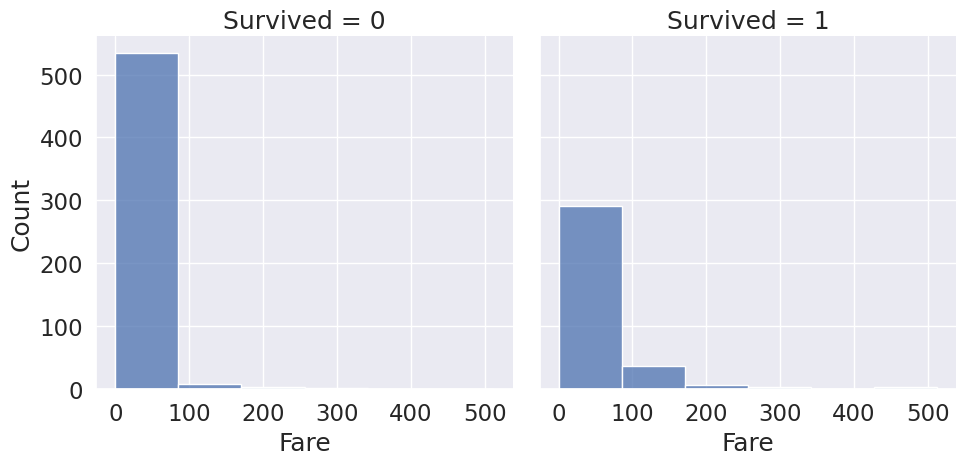

In [ ]:
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)

In [ ]:
#Grouping Fare
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 6)

In [ ]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

/tmp/ipython-input-1994933730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [ ]:
#Grouping Fare for Training Data
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <=  26.0), 'Fare'] = 3
train_df.loc[(train_df['Fare'] >  26.0) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.329, 'Fare']

#Grouping Fare for Testing Data
test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <=  26.0), 'Fare'] = 3
test_df.loc[(test_df['Fare'] >  26.0) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.329, 'Fare']


,Fare
343,512.3292


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Family_Size_Grouped_no,Age_Cut,Fare_Cut
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,NaN,0.0,2,Small,2,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,PC 17599,5.0,C85,1.0,2,Small,2,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,1.0,NaN,0.0,1,Alone,1,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5.0,1,0,113803,5.0,C123,0.0,2,Small,2,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,5.0,0,0,373450,1.0,NaN,0.0,1,Alone,1,"(32.312, 38.0]","(7.775, 8.662]"


In [ ]:
train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
#Extracting Title as a new Title Column
train_df['Title'] = train_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x:x.strip())
test_df['Title'] = test_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x:x.strip())

**Note:**
```
Military : Capt, Col, Major
Noble : Jonkheer, the Countess, Don, Lady, Sir
Unmarried Noble Females : Mlle, Ms, Mme
Religious Leader : Rev
```

In [ ]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [ ]:
train_df['Title'] = train_df['Title'].replace({
    'Capt':'Military',
    'Col':'Military',
    'Major': 'Military',
    'Jonkheer':'Noble',
    'the Countess':'Noble',
    'Don': 'Noble',
    'Lady':'Noble',
    'Sir':'Noble',
    'Mlle': 'Noble',
    'Ms':'Noble',
    'Mme': 'Noble'})

test_df['Title'] = test_df['Title'].replace({
    'Capt':'Military',
    'Col':'Military',
    'Major': 'Military',
    'Jonkheer':'Noble',
    'the Countess':'Noble',
    'Don': 'Noble',
    'Lady':'Noble',
    'Sir':'Noble',
    'Mlle': 'Noble',
    'Ms':'Noble',
    'Mme': 'Noble'})

In [ ]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [ ]:
train_df['Title'] = train_df['Title'].replace({
    'Dr':0,
    'Master':1,
    'Military':2,
    'Miss':3,
    'Mr':4,
    'Mrs':5,
    'Noble':6,
    'Rev':7})

test_df['Title'] = test_df['Title'].replace({
    'Dr':0,
    'Master':1,
    'Military':2,
    'Miss':3,
    'Mr':4,
    'Mrs':5,
    'Noble':6,
    'Rev':7
})

/tmp/ipython-input-4287525389.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Title'] = train_df['Title'].replace({


**Note:**

Converting Titles to numeric values:
```
Doc : 0
Master : 1
Military: 2
Miss: 3
Mr: 4
Mrs: 5
Noble: 6
Rev: 7
```

In [ ]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,0,7,0.428571
1,1,40,0.575000
2,2,5,0.400000
3,3,182,0.697802
4,4,517,0.156673
5,5,125,0.792000
6,6,9,0.777778
7,7,6,0.000000


In [ ]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

Text(0, 0.5, 'Frequency')

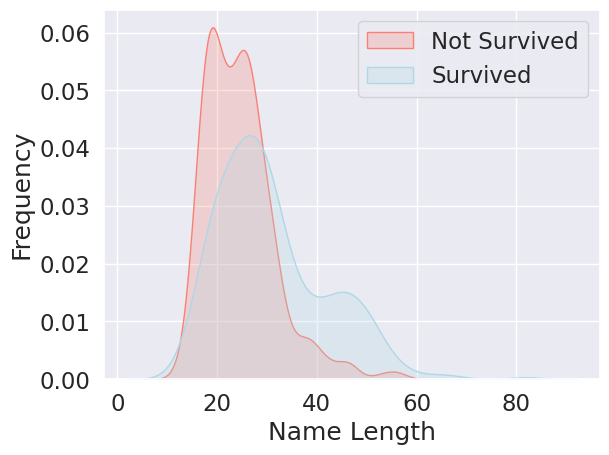

In [ ]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())], color='salmon', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())], ax=g, color='lightblue', fill=True)
g.legend(['Not Survived', 'Survived'])
g.set_xlabel('Name Length')
g.set_ylabel('Frequency')

In [ ]:
#Grouping Name Lengths
train_df['Name_Length_Group'] = pd.qcut(train_df['Name_Length'], 8)
test_df['Name_Length_Group'] = pd.qcut(test_df['Name_Length'], 8)

In [ ]:
train_df.groupby(['Name_Length_Group'], as_index=False)['Survived'].mean()

/tmp/ipython-input-3789668480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_Length_Group'], as_index=False)['Survived'].mean()


,Name_Length_Group,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [ ]:
#Grouping Name Length Group for Training Data
train_df.loc[train_df['Name_Length'] <= 18, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 18) & (train_df['Name_Length'] <= 20), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 20) & (train_df['Name_Length'] <= 23), 'Name_Size'] = 2
train_df.loc[(train_df['Name_Length'] > 23) & (train_df['Name_Length'] <= 25), 'Name_Size'] = 3
train_df.loc[(train_df['Name_Length'] > 25) & (train_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
train_df.loc[(train_df['Name_Length'] > 27.25) & (train_df['Name_Length'] <= 30), 'Name_Size'] = 5
train_df.loc[(train_df['Name_Length'] > 30) & (train_df['Name_Length'] <= 38), 'Name_Size'] = 6
train_df.loc[(train_df['Name_Length'] > 38) & (train_df['Name_Length'] <= 82), 'Name_Size'] = 7
train_df.loc[train_df['Name_Length'] > 82, 'Name_Size']

#Grouping Name Length Group for Testing Data
test_df.loc[test_df['Name_Length'] <= 18, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 18) & (test_df['Name_Length'] <= 20), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 20) & (test_df['Name_Length'] <= 23), 'Name_Size'] = 2
test_df.loc[(test_df['Name_Length'] > 23) & (test_df['Name_Length'] <= 25), 'Name_Size'] = 3
test_df.loc[(test_df['Name_Length'] > 25) & (test_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
test_df.loc[(test_df['Name_Length'] > 27.25) & (test_df['Name_Length'] <= 30), 'Name_Size'] = 5
test_df.loc[(test_df['Name_Length'] > 30) & (test_df['Name_Length'] <= 38), 'Name_Size'] = 6
test_df.loc[(test_df['Name_Length'] > 38) & (test_df['Name_Length'] <= 82), 'Name_Size'] = 7
test_df.loc[test_df['Name_Length'] > 82, 'Name_Size']

,Name_Size


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Family_Size,Family_Size_Grouped,Family_Size_Grouped_no,Age_Cut,Fare_Cut,Title,Name_Length,Name_Length_Group,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,...,0.0,2,Small,2,"(20.125, 24.0]","(-0.001, 7.775]",4,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,PC 17599,5.0,...,1.0,2,Small,2,"(32.312, 38.0]","(52.369, 512.329]",5,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,1.0,...,0.0,1,Alone,1,"(24.0, 28.0]","(7.775, 8.662]",3,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5.0,1,0,113803,5.0,...,0.0,2,Small,2,"(32.312, 38.0]","(52.369, 512.329]",5,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",0,5.0,0,0,373450,1.0,...,0.0,1,Alone,1,"(32.312, 38.0]","(7.775, 8.662]",4,24,"(23.0, 25.0]",3.0


In [ ]:
train_df['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [ ]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket':x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket':x.split()[-1]}))

In [ ]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count','mean']).sort_values(by='count', ascending=False)

,TicketNumber,count,mean
94,1601,7,0.714286
196,2343,7,0.000000
464,347082,7,0.000000
468,347088,6,0.000000
358,3101295,6,0.000000
...,...,...,...
276,2667,1,1.000000
278,2669,1,0.000000
279,26707,1,0.000000
280,2671,1,0.000000


In [ ]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

,TicketNumber
0,1
1,1
2,1
3,2
4,1
...,...
886,1
887,1
888,2
889,1


In [ ]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [ ]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count','mean']).sort_values(by='count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [ ]:
train_df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [ ]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [ ]:
train_df['TicketLocation'].value_counts()

,count
TicketLocation,
Blank,665
PC,60
C.A.,27
STON/O,12
A/5,10
W./C.,9
CA.,8
SOTON/O.Q.,8
A/5.,7


In [ ]:
test_df['TicketLocation'].value_counts()

,count
TicketLocation,
Blank,296
PC,32
C.A.,19
SOTON/O.Q.,8
SC/PARIS,6
W./C.,5
F.C.C.,4
CA.,4
CA,4


In [ ]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON',
    'SOTON/O.Q':'SOTON',
    'SOTON/OQ':'SOTON',
    'SOTON/O2':'SOTON',
    'C.A':'CA',
    'C.A.':'CA',
    'CA.':'CA',
    'C.A./SOTON':'CA',
    'SC/PARIS':'SC',
    'SC/Paris':'SC',
    'S.C./PARIS':'SC',
    'S.C./A.4.':'SC',
    'SC/AH':'SC',
    'SC/A4':'SC',
    'SC/A.3':'SC',
    'SO/C':'SOC',
    'S.O.C.':'SOC',
    'SCO/W':'SCO',
    'STON/O2':'STON',
    'STON/O2.':'STON',
    'STON/O':'STON',
    'STON/OQ.':'STON',
    'A/4':'A',
    'A/4.':'A',
    'A4.':'A',
    'A/5.':'A',
    'A/5':'A',
    'A.5.':'A',
    'A./5.':'A',
    'A/S':'A',
    'W./C.':'W/C',
    'WE/P':'WEP',
    'W.E.P.':'WEP',
    'S.W./PP':'SW/PP'
    })

#Test Set
test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON',
    'SOTON/O.Q':'SOTON',
    'SOTON/OQ':'SOTON',
    'SOTON/O2':'SOTON',
    'C.A':'CA',
    'C.A.':'CA',
    'CA.':'CA',
    'C.A./SOTON':'CA',
    'SC/PARIS':'SC',
    'SC/Paris':'SC',
    'S.C./PARIS':'SC',
    'S.C./A.4.':'SC',
    'SC/AH':'SC',
    'SC/A4':'SC',
    'SC/A.3':'SC',
    'SO/C':'SOC',
    'S.O.C.':'SOC',
    'SCO/W':'SCO',
    'STON/O2':'STON',
    'STON/O2.':'STON',
    'STON/O':'STON',
    'STON/OQ.':'STON',
    'A/4':'A',
    'A/4.':'A',
    'A4.':'A',
    'A/5.':'A',
    'A/5':'A',
    'A.5.':'A',
    'A./5.':'A',
    'A/S':'A',
    'W./C.':'W/C',
    'WE/P':'WEP',
    'W.E.P.':'WEP',
    'S.W./PP':'SW/PP',
    'A.':'A',
    'AQ/3.':'AQ',
    'AQ/4':'AQ',
    })

In [ ]:
train_df.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count','mean'])

,TicketLocation,count,mean
0,A,29,0.068966
1,Blank,665,0.383459
2,C,5,0.400000
3,CA,42,0.333333
4,F.C.,1,0.000000
5,F.C.C.,5,0.800000
6,Fa,1,0.000000
7,P/PP,2,0.500000
8,PC,60,0.650000
9,PP,3,0.666667


In [ ]:
test_df['TicketLocation'].value_counts()

,count
TicketLocation,
Blank,296
PC,32
CA,27
SC,13
A,11
SOTON,10
W/C,5
F.C.C.,4
STON,4


In [ ]:
train_df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [ ]:
train_df['Cabin'] = train_df['Cabin'].fillna('N')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('N')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [ ]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count','mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,N,687,0.299854
8,T,1,0.000000


In [ ]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['N'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['N'] else 1)

In [ ]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count','mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [ ]:
train_df['Cabin'] = train_df['Cabin'].replace({
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7,
    'N':8,
    'T':9
})

test_df['Cabin'] = test_df['Cabin'].replace({
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7,
    'N':8,
    'T':9
})

/tmp/ipython-input-3940641545.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Cabin'] = train_df['Cabin'].replace({
/tmp/ipython-input-3940641545.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Cabin'] = test_df['Cabin'].replace({


**Note:**

Converting Cabin class to numeric values:
```
Cabin A: 1
Cabin B: 2
Cabin C: 3
Cabin D: 4
Cabin E: 5
Cabin F: 6
Cabin G: 7
Cabin N: 8
Cabin T: 9
```

In [ ]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count','mean'])

,Cabin,count,mean
0,1,15,0.466667
1,2,47,0.744681
2,3,59,0.593220
3,4,33,0.757576
4,5,32,0.750000
5,6,13,0.615385
6,7,4,0.500000
7,8,687,0.299854
8,9,1,0.000000


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_Length_Group,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",4,23,"(20.0, 23.0]",2.0,21171,1,A,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",5,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",3,22,"(20.0, 23.0]",2.0,3101282,1,STON,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",5,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",0,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",4,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


In [ ]:
train_df.shape

(891, 25)

In [ ]:
test_df.shape

(418, 24)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PassengerId             891 non-null    int64   
 1   Survived                891 non-null    int64   
 2   Pclass                  891 non-null    int64   
 3   Name                    891 non-null    object  
 4   Sex                     891 non-null    int64   
 5   Age                     714 non-null    float64 
 6   SibSp                   891 non-null    int64   
 7   Parch                   891 non-null    int64   
 8   Ticket                  891 non-null    object  
 9   Fare                    891 non-null    float64 
 10  Cabin                   891 non-null    int64   
 11  Embarked                889 non-null    float64 
 12  Family_Size             891 non-null    int64   
 13  Family_Size_Grouped     891 non-null    object  
 14  Family_Size_Grouped_no  89

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PassengerId             418 non-null    int64   
 1   Pclass                  418 non-null    int64   
 2   Name                    418 non-null    object  
 3   Sex                     418 non-null    int64   
 4   Age                     332 non-null    float64 
 5   SibSp                   418 non-null    int64   
 6   Parch                   418 non-null    int64   
 7   Ticket                  418 non-null    object  
 8   Fare                    417 non-null    float64 
 9   Cabin                   418 non-null    int64   
 10  Embarked                418 non-null    int64   
 11  Family_Size             418 non-null    int64   
 12  Family_Size_Grouped     418 non-null    object  
 13  Family_Size_Grouped_no  418 non-null    int64   
 14  Age_Cut                 33

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Family_Size_Grouped_no', 'Age_Cut', 'Fare_Cut',
       'Title', 'Name_Length', 'Name_Length_Group', 'Name_Size',
       'TicketNumber', 'TicketNumberCounts', 'TicketLocation',
       'Cabin_Assigned'],
      dtype='object')

In [ ]:
train_df['Age'].value_counts()

,count
Age,
0.0,100
2.0,98
5.0,91
7.0,89
6.0,88
3.0,85
4.0,84
1.0,79


In [ ]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
#
train_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

/tmp/ipython-input-883632943.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
/tmp/ipython-input-883632943.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
train_df['Fare'].value_counts()

,count
Fare,
0.0000,156
3.0000,156
5.0000,146
4.0000,146
2.0000,145
1.0000,139
512.3292,3


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PassengerId             891 non-null    int64   
 1   Survived                891 non-null    int64   
 2   Pclass                  891 non-null    int64   
 3   Name                    891 non-null    object  
 4   Sex                     891 non-null    int64   
 5   Age                     891 non-null    float64 
 6   SibSp                   891 non-null    int64   
 7   Parch                   891 non-null    int64   
 8   Ticket                  891 non-null    object  
 9   Fare                    891 non-null    float64 
 10  Cabin                   891 non-null    int64   
 11  Embarked                889 non-null    float64 
 12  Family_Size             891 non-null    int64   
 13  Family_Size_Grouped     891 non-null    object  
 14  Family_Size_Grouped_no  89

In [ ]:
train_df = train_df.drop(['Age_Cut', 'Fare_Cut','Name_Length', 'Name_Length_Group','Family_Size_Grouped','Ticket','TicketLocation','TicketNumber','Name'], axis=1)
test_df = test_df.drop(['Age_Cut', 'Fare_Cut','Name_Length', 'Name_Length_Group','Family_Size_Grouped','Ticket','TicketLocation','TicketNumber','Name'], axis=1)

In [ ]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped_no,Title,Name_Size,TicketNumberCounts,Cabin_Assigned
0,1,0,3,0,2.0,1,0,0.0,8,0.0,2,2,4,2.0,1,0
1,2,1,1,1,5.0,1,0,5.0,3,1.0,2,2,5,7.0,1,1
2,3,1,3,1,3.0,0,0,1.0,8,0.0,1,1,3,2.0,1,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    int64  
 2   Pclass                  891 non-null    int64  
 3   Sex                     891 non-null    int64  
 4   Age                     891 non-null    float64
 5   SibSp                   891 non-null    int64  
 6   Parch                   891 non-null    int64  
 7   Fare                    891 non-null    float64
 8   Cabin                   891 non-null    int64  
 9   Embarked                889 non-null    float64
 10  Family_Size             891 non-null    int64  
 11  Family_Size_Grouped_no  891 non-null    int64  
 12  Title                   891 non-null    int64  
 13  Name_Size               891 non-null    float64
 14  TicketNumberCounts      891 non-null    in

In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,2


In [ ]:
train_df.dropna(inplace=True)

In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [ ]:
train_df.shape

(889, 16)

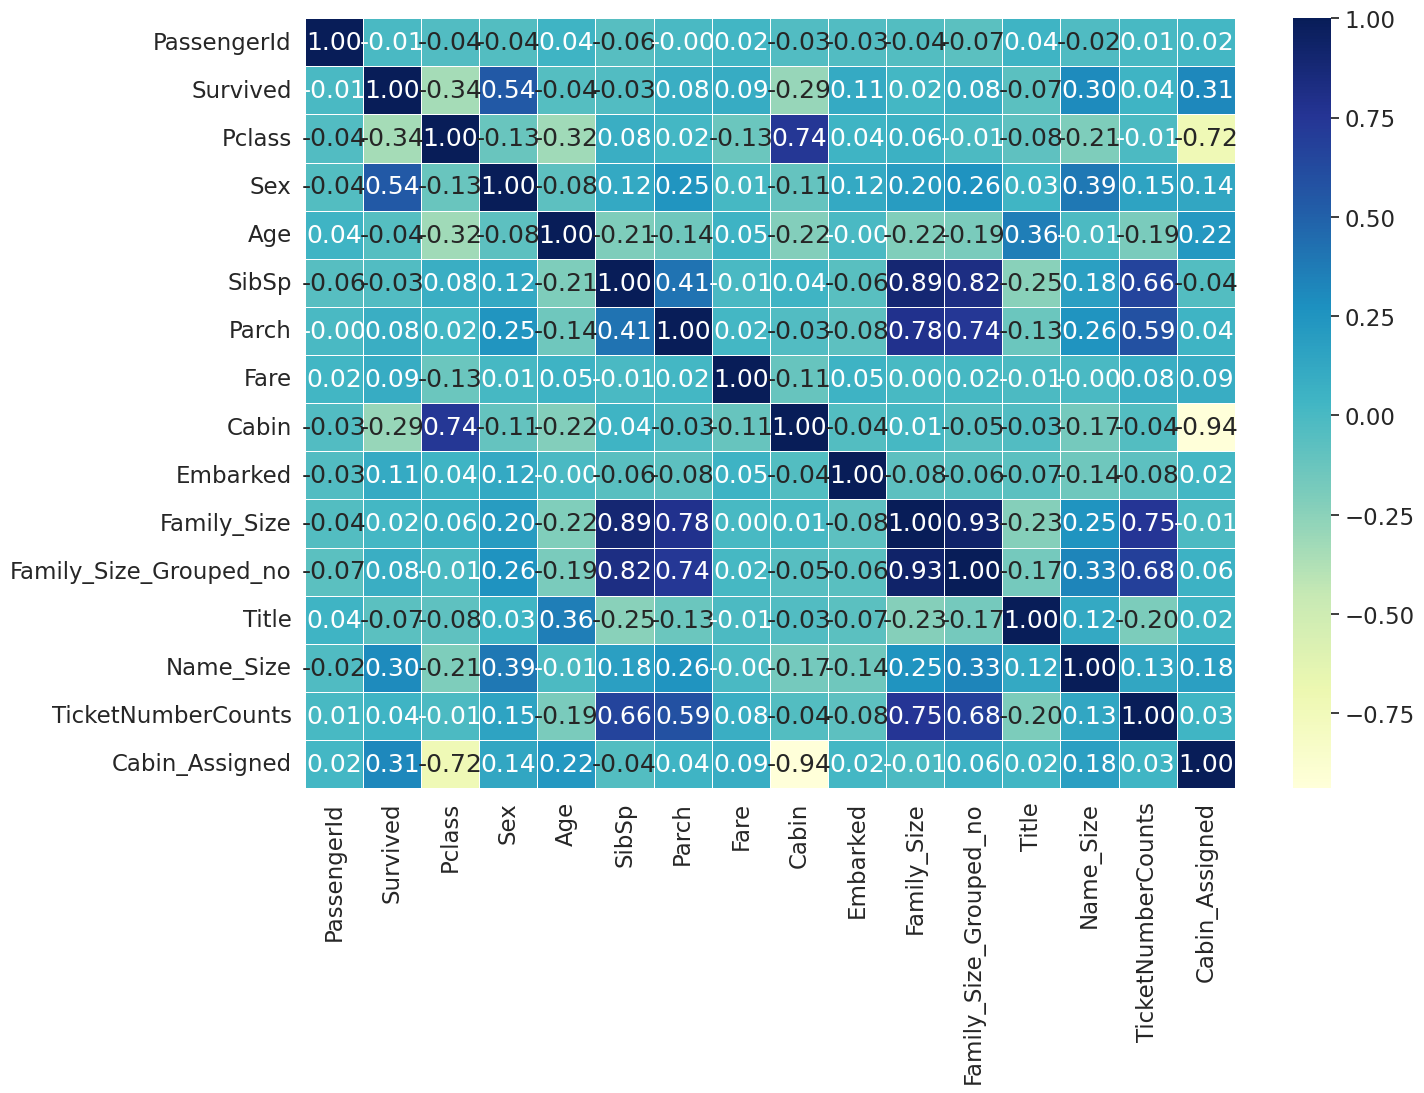

In [ ]:
#Correlation Matrix

corr_matrix = train_df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");

# **Modelling**

In [ ]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped_no,Title,Name_Size,TicketNumberCounts,Cabin_Assigned
0,1,0,3,0,2.0,1,0,0.0,8,0.0,2,2,4,2.0,1,0
1,2,1,1,1,5.0,1,0,5.0,3,1.0,2,2,5,7.0,1,1
2,3,1,3,1,3.0,0,0,1.0,8,0.0,1,1,3,2.0,1,0


In [ ]:
#Split data into X and y
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [ ]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped_no,Title,Name_Size,TicketNumberCounts,Cabin_Assigned
0,1,3,0,2.0,1,0,0.0,8,0.0,2,2,4,2.0,1,0
1,2,1,1,5.0,1,0,5.0,3,1.0,2,2,5,7.0,1,1
2,3,3,1,3.0,0,0,1.0,8,0.0,1,1,3,2.0,1,0
3,4,1,1,5.0,1,0,5.0,3,0.0,2,2,5,7.0,2,1
4,5,3,0,5.0,0,0,1.0,8,0.0,1,1,4,3.0,1,0


In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
#Split data into train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, len(y_train)

((711, 15), 711)

In [ ]:
X_test.shape, len(y_test)

((178, 15), 178)

In [ ]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped_no,Title,Name_Size,TicketNumberCounts,Cabin_Assigned
708,709,1,1,2.000000,0,0,5.0,8,0.0,1,1,3,1.0,4,0
240,241,3,1,3.462185,1,0,3.0,8,1.0,2,2,3,2.0,2,0
382,383,3,0,4.000000,0,0,1.0,8,0.0,1,1,4,0.0,1,0
792,793,3,1,3.462185,8,2,5.0,8,0.0,11,4,3,2.0,7,0
683,684,3,0,0.000000,5,2,4.0,8,0.0,8,4,4,4.0,6,0


We are going to try 3 different machine learning models:



```
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
```



In [ ]:
#Putting Models into Dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  '''
  Fits and evaluates given machine learning models.
  models : a dict of different Scikit-Learn machine learning models
  X_train : training data (no labels)
  X_test : testing data (no labels)
  y_train : training labels
  y_test : test labels
  '''

  np.random.seed(42)

  #Making a dictionary to keep model scores
  model_scores = {}
  #Loop through the models
  for name, model in models.items():
    #Fit the model to the data
    model.fit(X_train, y_train)
    #Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8089887640449438,
 'KNN': 0.6179775280898876,
 'Random Forest': 0.7752808988764045}

#### **Model Commparison**

<Axes: >

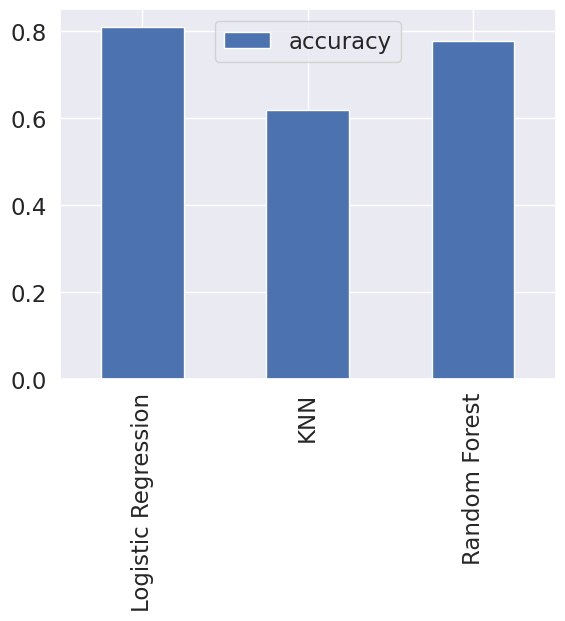

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

Let's look at the following


```
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC
* Area under the curve (AUC)
```



### **Hyperparameter tunning with RandomizedSearchCV**

Tunning the following models
```
* LogisticRegression()
* RandomForestClassifier()

....using RandomizedSearchCV
```


In [ ]:
#Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {'C':np.logspace(-4, 4, 20),
                'solver':['liblinear']}

#Creating a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}


Tunning using RandomizedSearchCV

In [ ]:
#Tune Logistic Regression
np.random.seed(42)

#Setup random hyperparameter search
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit random hyperparameter search
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
#Find the best hyperparameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [ ]:
#Evaluating the RandomizedSearch LogisticRegression
rs_log_reg.score(X_test, y_test)

0.8089887640449438

In [ ]:
#Tune Random Forest Classifier
np.random.seed(42)

#Setup random hyperparameter search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit random hyperparameter search
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
#Find the best hyperparameter
rs_rf.best_params_

{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(1),
 'max_depth': None}

In [ ]:
#Evaluating the RandomizedSearch RandomForest Classifier
rs_rf.score(X_test, y_test)

0.7921348314606742

In [ ]:
model_scores

{'Logistic Regression': 0.8089887640449438,
 'KNN': 0.6179775280898876,
 'Random Forest': 0.7752808988764045}

### **Hyperparameter tunning with GridSearchCV**

```LogisticRegression()```

In [ ]:
#Creating a different hyperparameter grid for LogisticRegression
log_reg_grid = {'C':np.logspace(-4, 4, 30),
                'solver':['liblinear']}

#Setup grid hyperparameter search
log_reg_grid = GridSearchCV(LogisticRegression(),
                            param_grid=log_reg_grid,
                            cv=10,
                            verbose=True)

#Fit grid hyperparameter search
log_reg_grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
#Find the best hyperparameter
log_reg_grid.best_params_

{'C': np.float64(1.3738237958832638), 'solver': 'liblinear'}

In [ ]:
#Evaluating the GridSearch LogisticRegression
log_reg_grid.score(X_test, y_test)

0.8202247191011236

In [ ]:
model_scores

{'Logistic Regression': 0.8089887640449438,
 'KNN': 0.6179775280898876,
 'Random Forest': 0.7752808988764045}

### **Evaluation the GridSearch LogisticRegression model**

```
* ROC & Area under the curve (AUC) Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score
```

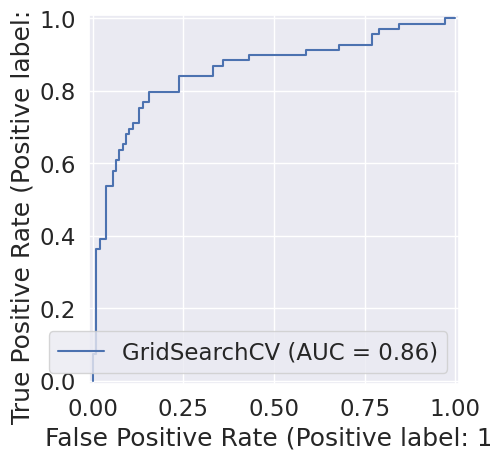

In [ ]:
#Plot Roc Curve and calculate AUC Metrixs
RocCurveDisplay.from_estimator(log_reg_grid, X_test, y_test)

In [ ]:
y_preds = log_reg_grid.predict(X_test)

In [ ]:
#Confusion Matrixs
print(confusion_matrix(y_test, y_preds))

[[91 18]
 [14 55]]


In [ ]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
  '''
  Plots a confusion matrix using Seaborn's heatmap()
  '''
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)

  plt.xlabel('True label')
  plt.ylabel('Predicted label')

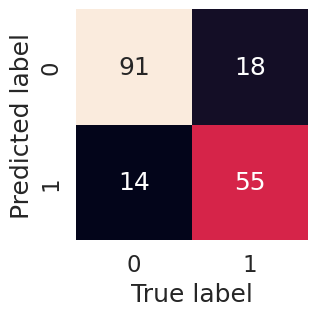

In [ ]:
plot_conf_matrix(y_test, log_reg_grid.predict(X_test))

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.75      0.80      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.82      0.82      0.82       178



### **Calculate evalution metrixs with cross-validation**
using ```cross_val_score()```

In [ ]:
#check the best hyperparameters
log_reg_grid.best_params_

{'C': np.float64(1.3738237958832638), 'solver': 'liblinear'}

In [ ]:
#Creating a new classifier with best parameters
clf = LogisticRegression(C=1.3738237958832638,
                         solver='liblinear')

In [ ]:
#cross-validation accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.80337079, 0.79213483, 0.79775281, 0.8258427 , 0.81920904])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8076620326287056)

In [ ]:
#cross-validation precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.7629667269717827)

In [ ]:
#cross-validation recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.723529411764706)

In [ ]:
#cross-validation f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.7422641278105552)

<Axes: title={'center': 'Cross-Validation Classification Metrics'}>

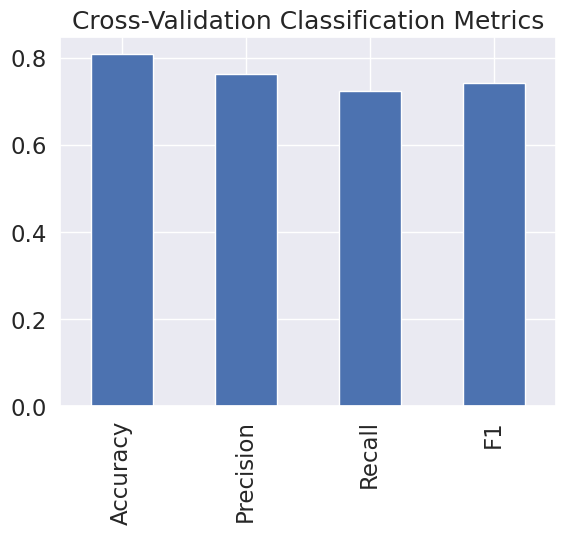

In [ ]:
#Visualizing cross-valuation metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision':cv_precision,
                           'Recall':cv_recall,
                           'F1':cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title='Cross-Validation Classification Metrics', legend=False)

### **Feature Importance**

In [ ]:
#check coef_
clf.fit(X_train, y_train)
clf.coef_

array([[ 2.10958181e-04, -4.79658895e-01,  2.55227187e+00,
        -1.75800664e-01, -2.73069270e-01,  7.16223355e-02,
         3.22654484e-01,  1.08792735e-01,  3.62584887e-01,
        -2.98905703e-01, -2.59917497e-01, -3.75997760e-01,
         1.83494440e-01,  7.41452360e-02,  9.88317828e-01]])

In [ ]:
#Match coef_ of features to columns
feature_dict = dict(zip(X.columns, clf.coef_[0]))
feature_dict

{'PassengerId': np.float64(0.00021095818067739757),
 'Pclass': np.float64(-0.4796588946475534),
 'Sex': np.float64(2.5522718739595835),
 'Age': np.float64(-0.17580066382818357),
 'SibSp': np.float64(-0.2730692695233133),
 'Parch': np.float64(0.07162233548558264),
 'Fare': np.float64(0.32265448420781156),
 'Cabin': np.float64(0.10879273496789031),
 'Embarked': np.float64(0.36258488668812905),
 'Family_Size': np.float64(-0.2989057026246402),
 'Family_Size_Grouped_no': np.float64(-0.25991749715910817),
 'Title': np.float64(-0.37599776001558516),
 'Name_Size': np.float64(0.18349444028868062),
 'TicketNumberCounts': np.float64(0.07414523601189625),
 'Cabin_Assigned': np.float64(0.988317827725333)}

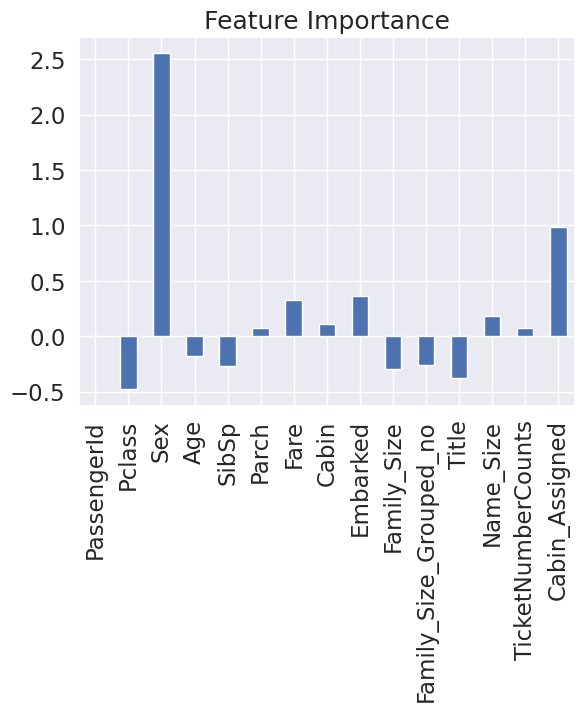

In [ ]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

# **Preparing Test dataset predictions for Kaggle**

In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped_no,Title,Name_Size,TicketNumberCounts,Cabin_Assigned
0,892,3,0,5.0,0,0,1.0,8,2,1,1,4,0.0,1,0
1,893,3,1,6.0,1,0,0.0,8,0,2,2,5,6.0,1,0
2,894,2,0,7.0,0,0,2.0,8,2,1,1,4,3.0,1,0
3,895,3,0,3.0,0,0,2.0,8,0,1,1,4,0.0,1,0
4,896,3,1,2.0,1,1,2.0,8,0,3,2,5,7.0,1,0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             418 non-null    int64  
 1   Pclass                  418 non-null    int64  
 2   Sex                     418 non-null    int64  
 3   Age                     418 non-null    float64
 4   SibSp                   418 non-null    int64  
 5   Parch                   418 non-null    int64  
 6   Fare                    418 non-null    float64
 7   Cabin                   418 non-null    int64  
 8   Embarked                418 non-null    int64  
 9   Family_Size             418 non-null    int64  
 10  Family_Size_Grouped_no  418 non-null    int64  
 11  Title                   418 non-null    object 
 12  Name_Size               418 non-null    float64
 13  TicketNumberCounts      418 non-null    int64  
 14  Cabin_Assigned          418 non-null    in

In [ ]:
test_df['Title'].unique()

array([4, 5, 3, 1, 6, 2, 7, 0, 'Dona'], dtype=object)

In [ ]:
test_df['Title'] = test_df['Title'].replace({
    'Dona': 6})

/tmp/ipython-input-2685305770.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Title'] = test_df['Title'].replace({


In [ ]:
test_df['Title'].unique()

array([4, 5, 3, 1, 6, 2, 7, 0])

### **Predicting the Test set**

In [ ]:
#Predicting the Test set
test_preds = clf.predict(test_df)
test_preds.shape, test_df.shape

((418,), (418, 15))

In [ ]:
# Create a DataFrame with PassengerId and predictions
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_preds})
submission_df.shape

(418, 2)

In [ ]:
#Save predicition dataframe to CSV for submission to kaggle
submission_df.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c titanic -f submission.csv -m test_submission

100% 2.77k/2.77k [00:01<00:00, 2.05kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster